<a href="https://colab.research.google.com/github/MansourMhz/MansourMhz/blob/main/Copy_of_Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
pwd

'/content'

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

In [69]:
pwd

'/content'

In [70]:
dataset = pd.read_csv('/content/drive/MyDrive/MasterThesis/xauusd.csv')

In [71]:
type(dataset)

pandas.core.frame.DataFrame

In [72]:
dataset.head(5)

,Date,Open,High,Low,Close
0,2016-03-01,1240.49,1248.77,1227.48,1232.66
1,2016-03-02,1231.44,1244.23,1225.02,1239.83
2,2016-03-03,1239.49,1268.55,1237.72,1264.87
3,2016-03-04,1260.20,1279.97,1250.78,1261.55
4,2016-03-07,1264.23,1273.43,1257.12,1267.54


In [73]:
dataset.shape

(1451, 5)

In [74]:
dataset.shape[0]

1451

In [75]:
dataset.shape[1]

5

In [76]:
num_train = int(dataset.shape[0]*0.70)

In [77]:
training_set = dataset.iloc[0:num_train,1].values #open

In [78]:
training_set.shape

(1015,)

In [79]:
testing_set = dataset.iloc[num_train:,1].values

In [80]:
testing_set.shape

(436,)

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
type(training_set)

numpy.ndarray

In [83]:
sc = MinMaxScaler(feature_range=(0,1))

In [84]:
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

In [85]:
testing_set_scaled = sc.fit_transform(testing_set.reshape(-1,1))

In [86]:
type(training_set_scaled)

numpy.ndarray

In [87]:
timestep = 60
X_train =[]
Y_train =[]

In [88]:
len(training_set)

1015

In [89]:
for i in range(timestep,len(training_set)):
    X_train.append(training_set_scaled[i-timestep:i,0])
    Y_train.append(training_set_scaled[i,0])

In [90]:
type(X_train)

x_train = np.array(X_train)

x_train = np.array(X_train)
y_train = np.array(Y_train)

In [91]:
type(y_train)

y_train.shape

x_train.shape

X_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

X_train.shape

Y_train = np.reshape(y_train,(y_train.shape[0],1))

Y_train.shape

X_test = []
Y_test =[]

In [92]:
for i in range(timestep,len(testing_set)):
    X_test.append(testing_set_scaled[i-timestep:i,0])
    Y_test.append(testing_set_scaled[i,0])

In [93]:
x_test = np.array(X_test)
y_test = np.array(Y_test)

X_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

Y_test = np.reshape(y_test,(y_test.shape[0],1))

#modeling
#X_train
#Y_train
#testing
#X_test
#Y_test

In [94]:
x_train = torch.from_numpy(X_train).type(torch.Tensor)

In [95]:
type(x_train)

y_train = torch.from_numpy(Y_train).type(torch.Tensor)

x_test = torch.from_numpy(X_test).type(torch.Tensor)

y_test = torch.from_numpy(Y_test).type(torch.Tensor)

#x_train
#y_train
#x_test
#y_test

In [96]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1

In [97]:
class MyLSTM(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers,output_dim):
        super(MyLSTM,self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = torch.nn.LSTM(input_dim, hidden_dim,num_layers, batch_first = True) #1 -- 32

        self.fc = torch.nn.Linear(hidden_dim, output_dim) #32 --- 1

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()   
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm (x, (h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:])

        return out

In [98]:
model = MyLSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

model

loss_fn = torch.nn.MSELoss()

params=model.parameters()
optimizer = torch.optim.Adam(params, lr=0.01)

#train model

num_epoch = 100
listLoss = np.zeros(num_epoch)

In [99]:
for t in range(num_epoch):

    y_train_pred = model(x_train) # forward inputs
    loss = loss_fn(y_train_pred , y_train) #loss
    listLoss[t] = loss.item() #save loss in list
    #print("epoch:",t,  "loss", loss.item()) #print lossepoch
    optimizer.zero_grad() #
    loss.backward() #
    optimizer.step() # update

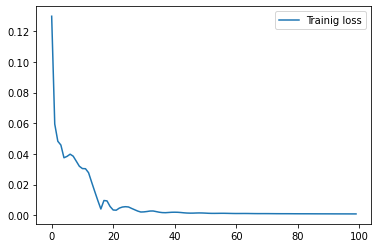

In [100]:
plt.plot(listLoss, label ="Trainig loss")
plt.legend()
plt.show()

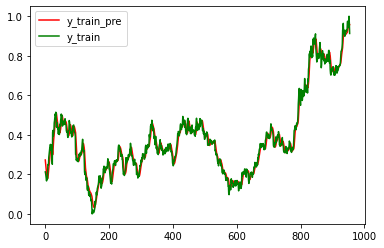

In [101]:
plt.plot(y_train_pred.detach().numpy(), label ="y_train_pre", color ='red')
plt.plot(y_train.detach().numpy(), label ="y_train", color ='green')
plt.legend()
plt.show()

In [102]:
from sklearn.metrics import accuracy_score, r2_score

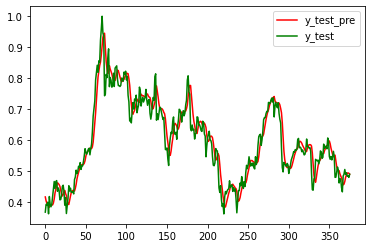

torch.Size([376, 1])

In [103]:
# train evaluation
r2_score = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())

r2_score

y_test_pred = model(x_test)

plt.plot(y_test_pred.detach().numpy(), label ="y_test_pre", color ='red')
plt.plot(y_test.detach().numpy(), label ="y_test", color ='green')
plt.legend()
plt.show()

y_test.shape

y_test_pred.shape

In [104]:
#test evaluation
r2_score = r2_score(y_test.detach().numpy(), y_test_pred.detach().numpy())

TypeError: ignored